<a href="https://colab.research.google.com/github/Shilajit-CR7/ML-Works/blob/main/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#import libraries for feature selection
from sklearn.feature_selection import chi2 #(chi square)
from sklearn.feature_selection import SelectKBest

In [ ]:
x = df.drop('price_range',axis='columns')
y = pd.DataFrame(df['price_range'])

In [ ]:
## Apply the KBest for top 10 features 
## K = 10 top features
best_features = SelectKBest(score_func=chi2,k=10)

In [ ]:
best_features.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x000001F105446A60>)

In [ ]:
score = pd.DataFrame(best_features.scores_)

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [ ]:
columns = pd.DataFrame(columns)
score_table = pd.concat([columns,score],axis='columns')

In [ ]:
score_table.columns = ['Feature','Score']
score_table.sort_values(by='Score',ascending=False)

,Feature,Score
13,px_width,931267.519053
11,pc,17363.569536
0,id,14129.866576
12,px_height,9810.586750
8,m_dep,95.972863
6,four_g,89.839124
15,sc_h,16.480319
16,sc_w,13.236400
4,dual_sim,10.135166
14,ram,9.614878


In [ ]:
#Feature Importance 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
model.fit(x,y)

C:\Users\Shilajit-CR7\AppData\Local\Temp\ipykernel_3856\1265173374.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


RandomForestClassifier()

In [ ]:
scores = pd.DataFrame(model.feature_importances_)
score_table = pd.concat([columns,scores],axis='columns')
score_table.columns = ['Feature','Score']
score_table.sort_values(by='Score',ascending=False)

,Feature,Score
13,px_width,0.471074
0,id,0.076705
12,px_height,0.057337
11,pc,0.057278
8,m_dep,0.038965
6,four_g,0.037746
16,sc_w,0.031842
10,n_cores,0.029777
15,sc_h,0.028667
2,blue,0.027541


<BarContainer object of 21 artists>

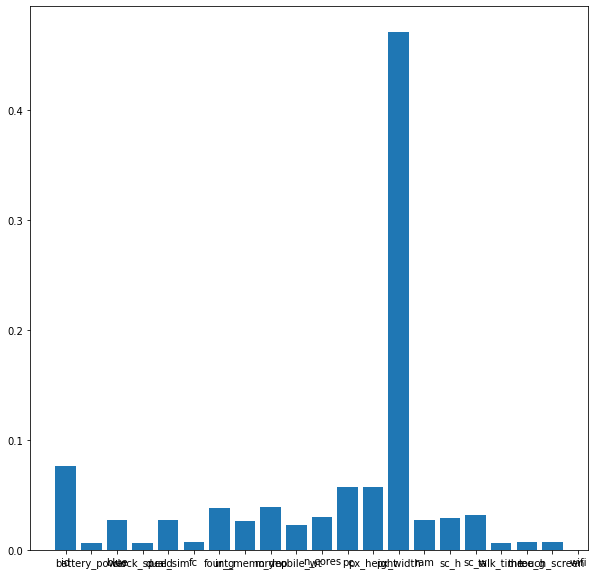

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(score_table['Feature'],score_table['Score'])

In [ ]:
#Check the model Performance
from sklearn.model_selection import cross_val_score

In [ ]:
rfc = RandomForestClassifier()


In [ ]:
acc = cross_val_score(rfc,x,y,cv=10)
acc

C:\Users\Shilajit-CR7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shilajit-CR7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shilajit-CR7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shilajit-CR7\

array([0.885, 0.875, 0.895, 0.875, 0.91 , 0.915, 0.87 , 0.87 , 0.875,
       0.9  ])

In [ ]:
acc.mean()

0.8870000000000001

In [ ]:
best_features = score_table.sort_values(by='Score',ascending=False)

In [ ]:
best_features

,Feature,Score
13,px_width,0.471074
0,id,0.076705
12,px_height,0.057337
11,pc,0.057278
8,m_dep,0.038965
6,four_g,0.037746
16,sc_w,0.031842
10,n_cores,0.029777
15,sc_h,0.028667
2,blue,0.027541


In [ ]:
#Drop the id row from the table
best_features.drop([0],inplace=True)

In [ ]:
best_features

,Feature,Score
13,px_width,0.471074
12,px_height,0.057337
11,pc,0.057278
8,m_dep,0.038965
6,four_g,0.037746
16,sc_w,0.031842
10,n_cores,0.029777
15,sc_h,0.028667
2,blue,0.027541
14,ram,0.027533


In [ ]:
#Take top 10
top = best_features.iloc[:10,0]

In [ ]:
top = list(top)
top

['px_width',
 'px_height',
 'pc',
 'm_dep',
 'four_g',
 'sc_w',
 'n_cores',
 'sc_h',
 'blue',
 'ram']

In [ ]:
x = df[['px_width',
 'px_height',
 'pc',
 'm_dep',
 'four_g',
 'sc_w',
 'n_cores',
 'sc_h',
 'blue',
 'ram']]

In [ ]:
x

,px_width,px_height,pc,m_dep,four_g,sc_w,n_cores,sc_h,blue,ram
0,756,20,2,0.6,0,7,2,9,0,2549
1,1988,905,6,0.7,1,3,3,17,1,2631
2,1716,1263,6,0.9,1,2,5,11,1,2603
3,1786,1216,9,0.8,0,8,6,16,1,2769
4,1212,1208,14,0.6,1,2,2,8,1,1411
...,...,...,...,...,...,...,...,...,...,...
1995,1890,1222,14,0.8,1,4,6,13,1,668
1996,1965,915,3,0.2,0,10,4,11,1,2032
1997,1632,868,3,0.7,1,1,8,9,0,3057
1998,670,336,5,0.1,1,10,5,18,0,869


In [ ]:
acc = cross_val_score(rfc,x,y,cv=10)
acc

C:\Users\Shilajit-CR7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shilajit-CR7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shilajit-CR7\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shilajit-CR7\

array([0.815, 0.795, 0.78 , 0.76 , 0.81 , 0.82 , 0.775, 0.83 , 0.76 ,
       0.775])

In [ ]:
acc.mean()

0.792